# Exploratory Data Analysis with Python Cookbook Practice

## Chapter One: Generating Summary Statistics

The following topics cover in this chapter:
- Analyzing the mean of a dataset
- Checking the median of a dataset
- Identifying the mode of a dataset
- Checking the variance of a dataset
- Identifying the standard deviation of a dataset
- Generating the range of a dataset
- Identifying the percentiles of a dataset
- Checking the quartiles of a dataset
- Analyzing the interquartile range (IQR) of a dataset

### 1. Analysing the mean of a dataset

In [140]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [141]:
import os

# Get the current working directory (this will work in most environments)
base_dir = os.getcwd()  # Current working directory

# Construct the full path to the CSV file (modify the structure if needed)
data_path = os.path.join(base_dir, 'Exploratory-Data-Analysis-with-Python-Cookbook-main', 'Ch1', 'Data', 'covid-data.csv')

# Check if the file exists
if os.path.exists(data_path):
    # Read the CSV file
    covid_data = pd.read_csv(data_path)
    print("The file is available.")  # Print the 'The file is available.'
else:
    print(f"File not found at: {data_path}")


The file is available.


In [142]:
covid_data.shape

(5818, 67)

In [143]:
covid_data.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                  int64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

#### Subset the covid_data to include relevant columns only

In [144]:
Sub_covid_data = covid_data[['iso_code','continent','location','date','total_cases','new_cases']]
Sub_covid_data

,iso_code,continent,location,date,total_cases,new_cases
0,AFG,Asia,Afghanistan,24/02/2020,5,5
1,AFG,Asia,Afghanistan,25/02/2020,5,0
2,AFG,Asia,Afghanistan,26/02/2020,5,0
3,AFG,Asia,Afghanistan,27/02/2020,5,0
4,AFG,Asia,Afghanistan,28/02/2020,5,0
...,...,...,...,...,...,...
5813,NGA,Africa,Nigeria,06/10/2022,265741,236
5814,NGA,Africa,Nigeria,07/10/2022,265741,0
5815,NGA,Africa,Nigeria,08/10/2022,265816,75
5816,NGA,Africa,Nigeria,09/10/2022,265816,0


In [145]:
Sub_covid_data .dtypes

iso_code       object
continent      object
location       object
date           object
total_cases     int64
new_cases       int64
dtype: object

In [146]:
Sub_covid_data.shape

(5818, 6)

#### 2. Get mean of the new case data

In [147]:
data_mean = np.mean(Sub_covid_data ["new_cases"])

#### Inspect result

In [148]:
data_mean

8814.365761430045

### Insight

On average, there were approximately 8,814 new COVID-19 cases reported daily across all countries in the dataset.

### 3. Analysing the median of a dataset

In [149]:
data_median = np.median(Sub_covid_data["new_cases"])

##### Inspect result

In [150]:
data_median

261.0

### Insight

The median is **261** while the average number of new daily COVID-19 cases stands at 8,814. The significantly lower median possibly, highlighting a substantial skew in the data.
This large difference indicates a heavily skewed distribution, likely caused by a small number of countries or days with exceptionally high case counts that significantly increased the mean.

### 4. Analysing the mode of a dataset

#### Identify the mode of the new_cases column using the mode method

In [151]:
from scipy import stats
data_mode = stats.mode(Sub_covid_data["new_cases"])

Inspect the result subset of the output to extract the mode:

In [152]:
data_mode


ModeResult(mode=0, count=805)

In [153]:
data_mode[0]

0

#### Identify the mode of the continent column using the mode method

In [154]:
data_mode = Sub_covid_data["continent"].mode()[0]
data_mode

'Europe'

The most frequent number of new COVID-19 cases is 0, showing many days with no reported cases—likely due to low transmission, underreporting, or data delays. This aligns with the skewed distribution observed earlier. The most common continent in the dataset is Europe, indicating it has the most entries, possibly due to more comprehensive or consistent reporting. Consequently, overall trends may be largely shaped by European data.

### 5. Checking the variance of a dataset

In [155]:
data_variance = np.var(Sub_covid_data["new_cases"])


Inspect the result:

In [156]:
data_variance

451321915.92810047

The variance is **451321915.92810047**. The high variance of **451 million** in new COVID-19 cases indicates a very wide spread in daily case counts. This suggests large fluctuations, with some days or countries reporting extremely high numbers while others had few or none. It confirms that the data is highly skewed, making the mean less reliable as a summary measure.

### 6. Identifying the standard deviation of a dataset

In [157]:
data_sd = np.std(Sub_covid_data["new_cases"])

In [158]:
data_sd

21244.33844411495

The standard deviation of **21,244** for new COVID-19 cases indicates a high level of variability around the average. This means daily case counts fluctuate significantly, with frequent extreme highs and lows. It supports the earlier observation that the data is highly dispersed and skewed, making the mean less representative of typical values.

### 7. Generating the range of a dataset

In [159]:
data_max = np.max(Sub_covid_data["new_cases"])
data_min = np.min(Sub_covid_data["new_cases"])

In [160]:
print("Max:", data_max, "\nMiN:" ,data_min)

Max: 287149 
MiN: 0


In [161]:
data_range = data_max - data_min
data_range

287149

The data range of 287,149 shows a vast difference between the lowest and highest daily COVID-19 case counts, indicating extreme variability and the presence of outliers. This supports earlier findings of a highly skewed and dispersed dataset.

### 8. Identifying the percentiles of a dataset

In [162]:
import numpy as np

# Calculate percentiles
data_percentiles = np.percentile(Sub_covid_data["new_cases"], [25, 50, 60, 75])

# Print results
percentile_labels = [25, 50, 60, 75]
for label, value in zip(percentile_labels, data_percentiles):
    print(f"{label}th percentile: {value}")


TypeError: 'Series' object is not callable

The percentiles show that most days had relatively low new COVID-19 cases, with 75% of days recording fewer than 3,666 cases. The sharp rise from the 60th (591) to 75th percentile highlights a steep increase in case counts, suggesting that a small number of days had exceptionally high cases. This confirms a right-skewed distribution, where a few extreme values significantly raise the upper range of the data.

### 8. Analyzing the interquartile range (IQR) of a dataset 
The interquartile range (IQR) measures the spread or variability of a dataset. It is simply the distance between the first and third quartiles.

In [ ]:
data_iqr = np.percentile(Sub_covid_data["new_cases"], [25, 75])
IQR = data_iqr[1] - data_iqr[0]
IQR

3642.0

An IQR of 3,642 shows significant variation in daily new COVID-19 cases within the middle 50% of the data. This indicates that even typical case counts fluctuated widely, reflecting high variability and reinforcing the presence of inconsistent daily trends in the dataset.

## Chapter Two: Preparing Data for EDA

The following topics cover in this chapter:
- Grouping data
- Appending data
- Concatenating data
- Merging data
- Sorting data
- Categorizing data
- Removing duplicate data
- Dropping data rows and columns
- Replacing data
- Changing a data format
- Dealing with missing values

### 1. Load all the datasets at a go and print thier shapes

In [ ]:
import os
import pandas as pd

# Define base directory and data folder
base_dir = os.getcwd()
data_folder = os.path.join(base_dir, 'Data_ChPt2')

# File list
#file_names = ['marketing_campaign1.csv', 'marketing_campaign2.csv', 'marketing_campaign3.csv']
# List of CSV filenames to read
file_names = ['marketing_campaign.csv', 'marketing_campaign_append1.csv', 'marketing_campaign_append2.csv','marketing_campaign_concat1.csv',
              'marketing_campaign_concat2.csv', 'marketing_campaign_merge1.csv', 'marketing_campaign_merge2.csv']
# Dictionary to hold each DataFrame separately
dataframes = {}

# Load each file individually
for file_name in file_names:
    file_path = os.path.join(data_folder, file_name)
    
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        dataframes[file_name] = df
        print(f"Loaded {file_name} with shape: {df.shape}")
    else:
        print(f"File not found: {file_path}")


Loaded marketing_campaign.csv with shape: (2240, 30)
Loaded marketing_campaign_append1.csv with shape: (500, 29)
Loaded marketing_campaign_append2.csv with shape: (500, 29)
Loaded marketing_campaign_concat1.csv with shape: (2240, 5)
Loaded marketing_campaign_concat2.csv with shape: (2240, 5)
Loaded marketing_campaign_merge1.csv with shape: (2240, 3)
Loaded marketing_campaign_merge2.csv with shape: (2240, 3)


### 1.1. Inspect the marketing_campaign dataset. Check the first few rows and use transpose (T) to show more information. 

In [ ]:
# Access the specific DataFrame
marketing_data = dataframes['marketing_campaign.csv']

marketing_data.head(5).T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94


### 1.2. Subset the dataframe to include only relevant columns. Also, check the data types as well as the number of columns and rows:

In [ ]:
marketing_data = marketing_data[['ID','Year_Birth','Education','Marital_Status','Income','Kidhome', 'Teenhome', 'Dt_Customer','Recency','NumStorePurchases','NumWebVisitsMonth']]

In [ ]:
marketing_data.head(3).T

,0,1,2
ID,5524,2174,4141
Year_Birth,1957,1954,1965
Education,Graduation,Graduation,Graduation
Marital_Status,Single,Single,Together
Income,58138.0,46344.0,71613.0
Kidhome,0,1,0
Teenhome,0,1,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013
Recency,58,38,26
NumStorePurchases,4,2,10


In [ ]:
marketing_data.dtypes

ID                     int64
Year_Birth             int64
Education             object
Marital_Status        object
Income               float64
Kidhome                int64
Teenhome               int64
Dt_Customer           object
Recency                int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
dtype: object

In [ ]:
marketing_data.shape

(2240, 11)

## 2. Groupby Method

### 2.1. Use the **groupby method** in pandas to get the average number of store purchases of customers based on the number of kids at home:

In [ ]:
marketing_data.groupby('Kidhome')['NumStorePurchases'].mean()

Kidhome
0    7.217324
1    3.863181
2    3.437500
Name: NumStorePurchases, dtype: float64

### 2.2. Use the **groupby method** in pandas to get the average number of store purchases of customers based on the number of Marital Status :

In [ ]:
marketing_data.groupby('Marital_Status')['NumStorePurchases'].mean()

Marital_Status
Absurd      6.500000
Alone       4.000000
Divorced    5.818966
Married     5.850694
Single      5.639583
Together    5.736207
Widow       6.415584
YOLO        6.000000
Name: NumStorePurchases, dtype: float64

## 3. Appending data

### 3.1 Load the .csv files and subeset the dataframes to include eelevant columns

In [ ]:
marketing_sample1 = dataframes['marketing_campaign_append1.csv']
marketing_sample1 = marketing_sample1[['ID','Year_Birth','Education','Marital_Status','Income','Kidhome', 'Teenhome', 'Dt_Customer','Recency','NumStorePurchases','NumWebVisitsMonth']]

In [ ]:
marketing_sample2 = dataframes['marketing_campaign_append2.csv']
marketing_sample2 = marketing_sample2[['ID','Year_Birth','Education','Marital_Status','Income','Kidhome', 'Teenhome', 'Dt_Customer','Recency','NumStorePurchases','NumWebVisitsMonth']]

### 3.2. Take a look at the two datasets. Check the first few rows and use transpose (T) to show more information

In [ ]:
marketing_sample1.head(5).T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04/09/2012,08/03/2014,21/08/2013,10/02/2014,19/01/2014
Recency,58,38,26,26,94
NumStorePurchases,4,2,10,4,6


In [ ]:
marketing_sample2.head(5).T

,0,1,2,3,4
ID,9135,466,9135,10623,8151
Year_Birth,1950,1944,1950,1961,1990
Education,Graduation,Graduation,Graduation,Master,Basic
Marital_Status,Together,Married,Together,Together,Married
Income,27203,65275,27203,48330,24279
Kidhome,1,0,1,0,0
Teenhome,1,0,1,1,0
Dt_Customer,06/08/2012,03/04/2013,06/08/2012,15/11/2013,29/12/2012
Recency,92,9,92,2,6
NumStorePurchases,2,13,2,3,3


### 3.3. Check the data types as well as the number of columns and rows

In [ ]:
marketing_sample1.dtypes


ID                     int64
Year_Birth             int64
Education             object
Marital_Status        object
Income               float64
Kidhome                int64
Teenhome               int64
Dt_Customer           object
Recency                int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
dtype: object

In [ ]:
marketing_sample1.shape

(500, 11)

In [ ]:
marketing_sample2.dtypes

ID                    int64
Year_Birth            int64
Education            object
Marital_Status       object
Income                int64
Kidhome               int64
Teenhome              int64
Dt_Customer          object
Recency               int64
NumStorePurchases     int64
NumWebVisitsMonth     int64
dtype: object

In [ ]:
marketing_sample2.shape

(500, 11)

### 3.4. Append the datasets. Use the concat method from the pandas library to append the data

In [ ]:
appended_datasets = pd.concat([marketing_sample1, marketing_sample2])

In [ ]:
appended_datasets.head(3).T

,0,1,2
ID,5524,2174,4141
Year_Birth,1957,1954,1965
Education,Graduation,Graduation,Graduation
Marital_Status,Single,Single,Together
Income,58138.0,46344.0,71613.0
Kidhome,0,1,0
Teenhome,0,1,0
Dt_Customer,04/09/2012,08/03/2014,21/08/2013
Recency,58,38,26
NumStorePurchases,4,2,10


In [ ]:
appended_datasets.shape

(1000, 11)

### 4. Concatenating data

### 4.1 Load the .csv files into a dataframe 

In [ ]:
marketing_sample1 = dataframes['marketing_campaign_concat1.csv']
marketing_sample2 = dataframes['marketing_campaign_concat2.csv']

### 4.2. Take a look at the two datasets. Check the first few rows and/ or use transpose (T) to show more information

In [ ]:
marketing_sample1.head(3)

,ID,Year_Birth,Education,Marital_Status,Income
0,5524,1957,Graduation,Single,58138.0
1,2174,1954,Graduation,Single,46344.0
2,4141,1965,Graduation,Together,71613.0


In [ ]:
marketing_sample2.head(3)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,3,8,10,4,7
1,2,1,1,2,5
2,1,8,2,10,4


### 4.3. Check the data types as well as the number of columns and rows

In [ ]:
marketing_sample1.dtypes

ID                  int64
Year_Birth          int64
Education          object
Marital_Status     object
Income            float64
dtype: object

In [ ]:
marketing_sample1.shape

(2240, 5)

In [ ]:
marketing_sample2.dtypes

NumDealsPurchases      int64
NumWebPurchases        int64
NumCatalogPurchases    int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
dtype: object

In [ ]:
marketing_sample2.shape

(2240, 5)

### 4.4. Concatenate the datasets. Use the concat method from the pandas library to concatenate the data
Note the additional argument for the axis parameter. The value 1 indicates that the axis refers to columns. The default value is typically 0, which refers to rows and is relevant for appending datasets. 

In [ ]:
concatenated_data = pd.concat([marketing_sample1, marketing_sample2], axis=1)

### 4.5. Inspect the shape of the result and the first few rows

In [ ]:
concatenated_data.shape

(2240, 10)

In [ ]:
concatenated_data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,1,8,2,10,4


In [ ]:
concatenated_data.head(3).T

,0,1,2
ID,5524,2174,4141
Year_Birth,1957,1954,1965
Education,Graduation,Graduation,Graduation
Marital_Status,Single,Single,Together
Income,58138.0,46344.0,71613.0
NumDealsPurchases,3,2,1
NumWebPurchases,8,1,8
NumCatalogPurchases,10,1,2
NumStorePurchases,4,2,10
NumWebVisitsMonth,7,5,4


## 5. Merging data

Merging sounds a bit like concatenating our dataset; however, it is quite different. To merge datasets, we need to have a common field in both datasets on which we can perform a merge.

### 5. Load the .csv files into a dataframe

In [ ]:
# Sample DataFrames (for context)
marketing_sample1 = pd.DataFrame({
    'ID': [101, 102, 103, 104],
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana']
})

In [ ]:
marketing_sample2 = pd.DataFrame({
    'ID': [103, 104, 105, 106],
    'Income': [55000.0, 62000.0, 48000.0, 51000.0]
})

### 5.1 Take a look at the two datasets. Check the first few rows through the head method. Also, check the number of columns and rows

In [ ]:
marketing_sample1.head()

,ID,Name
0,101,Alice
1,102,Bob
2,103,Charlie
3,104,Diana


In [ ]:
marketing_sample1.shape

(4, 2)

In [ ]:
marketing_sample2.head()

,ID,Income
0,103,55000.0
1,104,62000.0
2,105,48000.0
3,106,51000.0


In [ ]:
marketing_sample2.shape

(4, 2)

#### 5.2. Use the merge method from the pandas library to merge the datasets 

#### 5.2.1. Perform a Right Join in Pandas

In [ ]:
# Perform a right join on the shared 'ID' column
merged_right = pd.merge(
    marketing_sample1,
    marketing_sample2,
    on='ID',         # shared column name
    how='right'      # right join: keep all rows from marketing_sample2
)

In [ ]:
merged_right.head()

,ID,Name,Income
0,103,Charlie,55000.0
1,104,Diana,62000.0
2,105,NaN,48000.0
3,106,NaN,51000.0


#### 5.2.2. Perform a Left Join in Pandas

In [ ]:
# Perform a right join on the shared 'ID' column
merged_left = pd.merge(
    marketing_sample1,
    marketing_sample2,
    on='ID',         # shared column name
    how='left'      # left join: keep all rows from marketing_sample1
)

In [ ]:
merged_left.head()

,ID,Name,Income
0,101,Alice,NaN
1,102,Bob,NaN
2,103,Charlie,55000.0
3,104,Diana,62000.0


#### 5.2.3. Perform a Inner Join in Pandas

In [ ]:
# Perform inner join on 'ID'
merged_inner = pd.merge(
    marketing_sample1,
    marketing_sample2,
    on='ID',
    how='inner'  # Keeps only matching rows
)

In [ ]:
merged_inner.head()

,ID,Name,Income
0,103,Charlie,55000.0
1,104,Diana,62000.0


#### 5.2.4. Perform a Right Join in Pandas

In [ ]:
# Perform full outer join on 'ID'
merged_outer = pd.merge(
    marketing_sample1,
    marketing_sample2,
    on='ID',
    how='outer'  # Keeps all rows from both DataFrames
)

In [ ]:
merged_outer

,ID,Name,Income
0,101,Alice,NaN
1,102,Bob,NaN
2,103,Charlie,55000.0
3,104,Diana,62000.0
4,105,NaN,48000.0
5,106,NaN,51000.0


### 6. Sorting data

#### 6.1. We will sort data using the pandas library
#### Load the .csv file into a dataframe using read_csv. Then, subset the dataframe to include only relevant columns

In [ ]:
# Access the specific DataFrame
marketing_data = dataframes['marketing_campaign.csv']

marketing_data = marketing_data[['ID','Year_Birth','Education','Marital_Status','Income','Kidhome', 'Teenhome', 'Dt_Customer','Recency','NumStorePurchases','NumWebVisitsMonth']]


##### Inspect the data. Check the first few rows and use transpose (T) to show more information. Also, check the data types as well as the number of columns and rows:

In [ ]:
marketing_data.head(2).T

,0,1
ID,5524,2174
Year_Birth,1957,1954
Education,Graduation,Graduation
Marital_Status,Single,Single
Income,58138.0,46344.0
Kidhome,0,1
Teenhome,0,1
Dt_Customer,04-09-2012,08-03-2014
Recency,58,38
NumStorePurchases,4,2


In [ ]:
marketing_data.dtypes

ID                     int64
Year_Birth             int64
Education             object
Marital_Status        object
Income               float64
Kidhome                int64
Teenhome               int64
Dt_Customer           object
Recency                int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
dtype: object

In [ ]:
marketing_data.shape

(2240, 11)

#### 6.1. Sort customers based on the number of store purchases in descending order

In [ ]:
sorted_data = marketing_data.sort_values('NumStorePurchases', ascending=False)

In [ ]:
#Inspect the result. Subset for relevant columns
sorted_data[['ID','NumStorePurchases']]

,ID,NumStorePurchases
1187,9855,13
803,9930,13
1144,819,13
286,10983,13
1150,1453,13
...,...,...
164,8475,0
2214,9303,0
27,5255,0
1042,10749,0


### 7. Categorizing data

#### 7.1. Categorize data using the pandas library
#### Load the .csv file into a dataframe using read_csv. Then, subset the dataframe to include only relevant columns

In [ ]:
# Access the specific DataFrame
marketing_data = dataframes['marketing_campaign.csv']

marketing_data = marketing_data[['ID','Year_Birth','Education','Marital_Status','Income','Kidhome', 'Teenhome', 'Dt_Customer','Recency','NumStorePurchases','NumWebVisitsMonth']]

In [ ]:
marketing_data.head(2).T

,0,1
ID,5524,2174
Year_Birth,1957,1954
Education,Graduation,Graduation
Marital_Status,Single,Single
Income,58138.0,46344.0
Kidhome,0,1
Teenhome,0,1
Dt_Customer,04-09-2012,08-03-2014
Recency,58,38
NumStorePurchases,4,2


#### 7.2. Categorize the number of store purchases into high, moderate, and low categories

In [ ]:
marketing_data['bins'] = pd.cut(x=marketing_data['NumStorePurchases'], bins=[0,4,8,13],labels = ['Low', 'Moderate', 'High'])

/var/folders/rm/nyzs6ktj6q9b0gzwsk4ntjqw0000gn/T/ipykernel_840/1566071206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data['bins'] = pd.cut(x=marketing_data['NumStorePurchases'], bins=[0,4,8,13],labels = ['Low', 'Moderate', 'High'])


#### 7.3. Inspect the result. Subset for relevant columns

In [ ]:
marketing_data[['NumStorePurchases','bins']].head()

,NumStorePurchases,bins
0,4,Low
1,2,Low
2,10,High
3,4,Low
4,6,Moderate


### 8. Removing duplicate data

#### 8.1. In pandas, the drop_duplicates method can help us with handling duplicate values or records within our dataset.
#### Load the .csv file into a dataframe using read_csv. Then, subset the dataframe to include only relevant columns

In [ ]:
# Access the specific DataFrame
marketing_data = dataframes['marketing_campaign.csv']
marketing_data = marketing_data[['Education','Marital_Status','Kidhome', 'Teenhome']]

#### 8.2. Check the first few rows. Also, check the number of columns and rows:

In [ ]:
marketing_data.head()

,Education,Marital_Status,Kidhome,Teenhome
0,Graduation,Single,0,0
1,Graduation,Single,1,1
2,Graduation,Together,0,0
3,Graduation,Together,1,0
4,PhD,Married,1,0


In [ ]:
marketing_data.shape

(2240, 4)

#### 8.3. Remove duplicate across the four columns in our dataset:

In [ ]:
marketting_data_duplicate = marketing_data.drop_duplicates()

In [ ]:
marketting_data_duplicate.tail(8)

,Education,Marital_Status,Kidhome,Teenhome
1806,PhD,Single,0,2
2077,Basic,Widow,0,0
2093,Graduation,Absurd,0,0
2134,Master,Absurd,0,0
2147,Master,Together,1,2
2177,PhD,YOLO,0,1
2208,Basic,Together,0,1
2223,Master,Married,1,2


In [ ]:
marketting_data_duplicate.shape

(135, 4)

### 9. Dropping data rows and columns

#### 9.1. Load the .csv file into a dataframe using read_csv. Then, subset the dataframe to include only relevant columns:

In [ ]:
# Access the specific DataFrame
marketing_data = dataframes['marketing_campaign.csv']
marketing_data = marketing_data[['ID', 'Year_Birth',
'Education', 'Marital_Status']]

#### 9.2. Inspect the data. Check the first few rows. Check the number of columns and rows:

In [ ]:
marketing_data.head(5)

,ID,Year_Birth,Education,Marital_Status
0,5524,1957,Graduation,Single
1,2174,1954,Graduation,Single
2,4141,1965,Graduation,Together
3,6182,1984,Graduation,Together
4,5324,1981,PhD,Married


In [ ]:
marketing_data.shape

(2240, 4)

#### 9.3 Delete a specified row at index 4:

In [ ]:
marketing_data.drop(labels=[4], axis=0)

,ID,Year_Birth,Education,Marital_Status
0,5524,1957,Graduation,Single
1,2174,1954,Graduation,Single
2,4141,1965,Graduation,Together
3,6182,1984,Graduation,Together
5,7446,1967,Master,Together
...,...,...,...,...
2235,10870,1967,Graduation,Married
2236,4001,1946,PhD,Together
2237,7270,1981,Graduation,Divorced
2238,8235,1956,Master,Together


#### 9.4. Improved Code to Drop Rows 4 to 9

In [ ]:
marketing_data = marketing_data.drop(index=range(4, 10)).reset_index(drop=True)

In [ ]:
marketing_data

,ID,Year_Birth,Education,Marital_Status
0,5524,1957,Graduation,Single
1,2174,1954,Graduation,Single
2,4141,1965,Graduation,Together
3,6182,1984,Graduation,Together
4,1994,1983,Graduation,Married
...,...,...,...,...
2229,10870,1967,Graduation,Married
2230,4001,1946,PhD,Together
2231,7270,1981,Graduation,Divorced
2232,8235,1956,Master,Together


#### 9.5. Delete a single column. In this case Year_Birth

In [ ]:
marketing_data.drop(labels=['Year_Birth'], axis=1)

,ID,Education,Marital_Status
0,5524,Graduation,Single
1,2174,Graduation,Single
2,4141,Graduation,Together
3,6182,Graduation,Together
4,1994,Graduation,Married
...,...,...,...
2229,10870,Graduation,Married
2230,4001,PhD,Together
2231,7270,Graduation,Divorced
2232,8235,Master,Together


### 10. Replacing data

#### 10.1. Load the .csv file into a dataframe using read_csv. Then, subset the dataframe to include only relevant columns:

In [ ]:
# Access the specific DataFrame
marketing_data = dataframes['marketing_campaign.csv']
marketing_data = marketing_data[['ID','Year_Birth','Kidhome', 'Teenhome']]

In [ ]:
marketing_data.head(5)

,ID,Year_Birth,Kidhome,Teenhome
0,5524,1957,0,0
1,2174,1954,1,1
2,4141,1965,0,0
3,6182,1984,1,0
4,5324,1981,1,0


In [ ]:
marketing_data.shape

(2240, 4)

#### 10.2. Replace the values in Teenhome with has teen and has no teen:

In [ ]:
marketing_data['Teenhome_replaced'] = marketing_data['Teenhome'].replace([0,1,2],['has no teen','has teen','have teens'])

/var/folders/rm/nyzs6ktj6q9b0gzwsk4ntjqw0000gn/T/ipykernel_840/872877734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data['Teenhome_replaced'] = marketing_data['Teenhome'].replace([0,1,2],['has no teen','has teen','have teens'])


In [ ]:
# Inspect the output:
marketing_data[['Teenhome', 'Teenhome_replaced']].head()

,Teenhome,Teenhome_replaced
0,0,has no teen
1,1,has teen
2,0,has no teen
3,0,has no teen
4,0,has no teen


In [ ]:
marketing_data.head(7)

,ID,Year_Birth,Kidhome,Teenhome,Teenhome_replaced
0,5524,1957,0,0,has no teen
1,2174,1954,1,1,has teen
2,4141,1965,0,0,has no teen
3,6182,1984,1,0,has no teen
4,5324,1981,1,0,has no teen
5,7446,1967,0,1,has teen
6,965,1971,0,1,has teen


#### 10.3. Use Regex also know as regular expression to match pattern and replacement

In [ ]:
import pandas as pd

# Dummy contact data
dummy_contacts = {
    'Contact_Info': [
        'john.doe@example.com',
        'jane123@mail.co.uk',
        '+44 7700 900123',
        '(202) 555-0125',
        'hello there!',
        'feedback@company.org',
        'not_a_contact',
        '07555 123456',
        'admin@web.net',
        'random text'
    ]
}

df = pd.DataFrame(dummy_contacts)

# Function to classify contact type using regex
def classify_contact(info):
    if pd.isna(info):
        return 'Unknown'
    elif pd.Series(info).str.contains(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', regex=True).bool():
        return 'Email'
    elif pd.Series(info).str.contains(r'(\+?\d{1,4})?[\s\-()]?\d{3,4}[\s\-()]?\d{3,4}[\s\-()]?\d{3,4}', regex=True).bool():
        return 'Phone Number'
    else:
        return 'Unknown'

# Apply classification
df['Category'] = df['Contact_Info'].apply(classify_contact)

# Anonymise sensitive info using regex
df['Anonymised'] = df['Contact_Info'].replace(
    r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '[EMAIL]', regex=True)
df['Anonymised'] = df['Anonymised'].replace(
    r'(\+?\d{1,4})?[\s\-()]?\d{3,4}[\s\-()]?\d{3,4}[\s\-()]?\d{3,4}', '[PHONE]', regex=True)

# View result
print(df)


           Contact_Info      Category      Anonymised
0  john.doe@example.com         Email         [EMAIL]
1    jane123@mail.co.uk         Email         [EMAIL]
2       +44 7700 900123  Phone Number         [PHONE]
3        (202) 555-0125       Unknown  (202) 555-0125
4          hello there!       Unknown    hello there!
5  feedback@company.org         Email         [EMAIL]
6         not_a_contact       Unknown   not_a_contact
7          07555 123456  Phone Number         [PHONE]
8         admin@web.net         Email         [EMAIL]
9           random text       Unknown     random text


/var/folders/rm/nyzs6ktj6q9b0gzwsk4ntjqw0000gn/T/ipykernel_840/1117858860.py:25: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  elif pd.Series(info).str.contains(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', regex=True).bool():
/var/folders/rm/nyzs6ktj6q9b0gzwsk4ntjqw0000gn/T/ipykernel_840/1117858860.py:27: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  elif pd.Series(info).str.contains(r'(\+?\d{1,4})?[\s\-()]?\d{3,4}[\s\-()]?\d{3,4}[\s\-()]?\d{3,4}', regex=True).bool():
/var/folders/rm/nyzs6ktj6q9b0gzwsk4ntjqw0000gn/T/ipykernel_840/1117858860.py:27: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  elif pd.Series(info).str.contains(r'(\+?\d{1,4})?[\s\-()]?\d{3,4}[\s\-()]?\d{3,4}[\s\-()]?\d{3,4}', regex=True).bool():


### 11. Changing a data format

#### 11.1. Load the .csv file into a dataframe using read_csv. Then, subset the dataframe to include only relevant columns:

In [ ]:
# Access the specific DataFrame
marketing_data = dataframes['marketing_campaign.csv']
marketing_data = marketing_data[['ID', 'Year_Birth','Marital_Status','Income']]

#### 11.2. Inspect the data. Check the first few rows. Check the number of columns and rows:

In [ ]:
marketing_data.head()

,ID,Year_Birth,Marital_Status,Income
0,5524,1957,Single,58138.0
1,2174,1954,Single,46344.0
2,4141,1965,Together,71613.0
3,6182,1984,Together,26646.0
4,5324,1981,Married,58293.0


In [ ]:
marketing_data.shape

(2240, 4)

#### 11.3. Count NaN Values in 'Income' Column

In [ ]:
missing_income_count = marketing_data['Income'].isna().sum()
print(f"Number of missing values in 'Income': {missing_income_count}")

Number of missing values in 'Income': 24


#### 11.4 Fill NAs in the Income column:

In [ ]:
marketing_data['Income'] = marketing_data['Income'].fillna(0)

/var/folders/rm/nyzs6ktj6q9b0gzwsk4ntjqw0000gn/T/ipykernel_840/1120590707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data['Income'] = marketing_data['Income'].fillna(0)


In [ ]:
marketing_data

,ID,Year_Birth,Marital_Status,Income
0,5524,1957,Single,58138.0
1,2174,1954,Single,46344.0
2,4141,1965,Together,71613.0
3,6182,1984,Together,26646.0
4,5324,1981,Married,58293.0
...,...,...,...,...
2235,10870,1967,Married,61223.0
2236,4001,1946,Together,64014.0
2237,7270,1981,Divorced,56981.0
2238,8235,1956,Together,69245.0


#### 11.5 Change the data type of the Income column from float to int:

In [ ]:
marketing_data['Income_changed'] = marketing_data['Income'].astype(int)

/var/folders/rm/nyzs6ktj6q9b0gzwsk4ntjqw0000gn/T/ipykernel_840/4150893889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data['Income_changed'] = marketing_data['Income'].astype(int)


#### 11.6. Inspect the output using the head method and dtypes attribute:

In [ ]:
marketing_data[['Income', 'Income_changed']].head

<bound method NDFrame.head of        Income  Income_changed
0     58138.0           58138
1     46344.0           46344
2     71613.0           71613
3     26646.0           26646
4     58293.0           58293
...       ...             ...
2235  61223.0           61223
2236  64014.0           64014
2237  56981.0           56981
2238  69245.0           69245
2239  52869.0           52869

[2240 rows x 2 columns]>

In [ ]:
marketing_data[['Income', 'Income_changed']].dtypes

Income            float64
Income_changed      int64
dtype: object

### 12. Dealing with missing values
#### In this recipe, we will focus on dropping missing values using the dropna method in pandas

#### 12.1. Load the .csv file into a dataframe using read_csv. Then, subset the dataframe to include only relevant columns:

In [ ]:
# Access the specific DataFrame
marketing_data = dataframes['marketing_campaign.csv']
marketing_data = marketing_data[['ID', 'Year_Birth','Education','Income']]

#### 12.2. Inspect the data. Check the first few rows, and check the number of columns and rows:

In [ ]:
marketing_data.head()

,ID,Year_Birth,Education,Income
0,5524,1957,Graduation,58138.0
1,2174,1954,Graduation,46344.0
2,4141,1965,Graduation,71613.0
3,6182,1984,Graduation,26646.0
4,5324,1981,PhD,58293.0


In [ ]:
marketing_data.shape

(2240, 4)

#### 12.3 Check for missing values using the isnull and sum methods:

In [ ]:
marketing_data.isnull().sum()

ID             0
Year_Birth     0
Education      0
Income        24
dtype: int64

#### 12.4 Drop missing values using the dropna method:

In [ ]:
marketing_data_withoutna = marketing_data.dropna(how = 'any')
marketing_data_withoutna.isnull().sum()

ID            0
Year_Birth    0
Education     0
Income        0
dtype: int64

## Chapter 3: Visualising Data in Python

The following topics cover in this chapter:
- Preparing for Visualisation
- Visualising data in Matplotlib
- Visualising data in Seaborn
- Visuaising data in GGPLOT
- Visualising data in Bokeh

#### 1. Load all the datasets at a go and print thier shapes

In [ ]:
import os
import pandas as pd

# Define base directory and data folder
base_dir = os.getcwd()
data_folder = os.path.join(base_dir, 'Exploratory-Data-Analysis-with-Python-Cookbook-main', 'Ch3', 'Data')

# File list
#file_names = ['marketing_campaign1.csv', 'marketing_campaign2.csv', 'marketing_campaign3.csv']
# List of CSV filenames to read
file_names = ['HousingPricesData.csv', 'HousingPricesData2.csv']
# Dictionary to hold each DataFrame separately
dataframes = {}

# Load each file individually
for file_name in file_names:
    file_path = os.path.join(data_folder, file_name)
    
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        dataframes[file_name] = df
        print(f"Loaded {file_name} with shape: {df.shape}")
    else:
        print(f"File not found: {file_path}")


Loaded HousingPricesData.csv with shape: (924, 8)
Loaded HousingPricesData2.csv with shape: (924, 8)


#### 1. Inspect the marketing_campaign dataset. Check the first few rows and use transpose (T) to show more information.

In [ ]:
# Access the specific DataFrame
houseprices_data = dataframes['HousingPricesData.csv']
houseprices_data.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


#### 2. Subset the dataframe to include only relevant columns:

In [ ]:
houseprices_data = houseprices_data[['Zip', 'Price', 'Area', 'Room']]
houseprices_data.head()

,Zip,Price,Area,Room
0,1091 CR,685000.0,64,3
1,1059 EL,475000.0,60,3
2,1097 SM,850000.0,109,4
3,1060 TH,580000.0,128,6
4,1036 KN,720000.0,138,5


In [ ]:
houseprices_data.shape

(924, 4)

In [ ]:
houseprices_data.dtypes

Zip       object
Price    float64
Area       int64
Room       int64
dtype: object

#### 3. Create a PriceperSqm variable based on the Price and Area variables:

In [ ]:
houseprices_data['PriceperSqm'] = houseprices_data['Price']/houseprices_data['Area']
houseprices_data.head()

/var/folders/rm/nyzs6ktj6q9b0gzwsk4ntjqw0000gn/T/ipykernel_840/574207455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houseprices_data['PriceperSqm'] = houseprices_data['Price']/houseprices_data['Area']


,Zip,Price,Area,Room,PriceperSqm
0,1091 CR,685000.0,64,3,10703.125000
1,1059 EL,475000.0,60,3,7916.666667
2,1097 SM,850000.0,109,4,7798.165138
3,1060 TH,580000.0,128,6,4531.250000
4,1036 KN,720000.0,138,5,5217.391304


In [ ]:
houseprices_data.dtypes

Zip             object
Price          float64
Area             int64
Room             int64
PriceperSqm    float64
dtype: object

#### 4. Sort the dataframe based on the house prices and inspect the output:

In [ ]:
houseprices_data_sorted = houseprices_data.sort_values('Price', ascending= False)
houseprices_data.head()

,Zip,Price,Area,Room,PriceperSqm
0,1091 CR,685000.0,64,3,10703.125000
1,1059 EL,475000.0,60,3,7916.666667
2,1097 SM,850000.0,109,4,7798.165138
3,1060 TH,580000.0,128,6,4531.250000
4,1036 KN,720000.0,138,5,5217.391304


### 5. Visualizing data in Matplotlib

#### 5.1. Plot a bar chart in matplotlib with basic details:

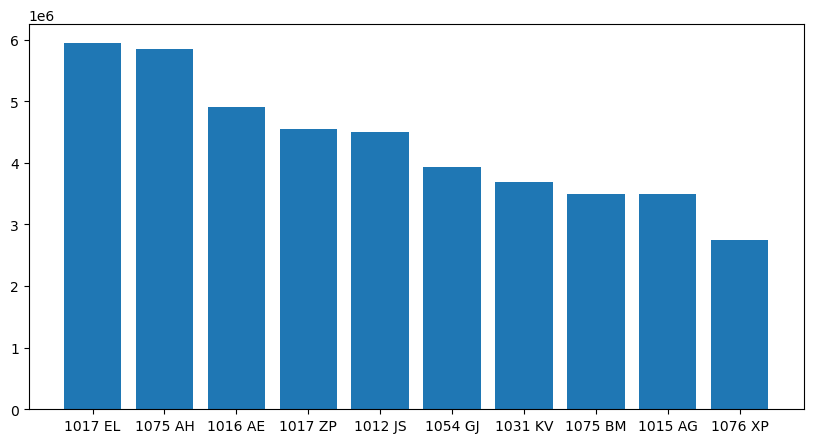

In [ ]:
plt.figure(figsize= (10,5))
zip = houseprices_data_sorted['Zip'] [0:10]
Price = houseprices_data_sorted['Price'] [0:10]
plt.bar(zip, Price)
plt.show()

#### 5.2. Plot a bar chart in matplotlib with additional informative details such as the title, x label, and y label:

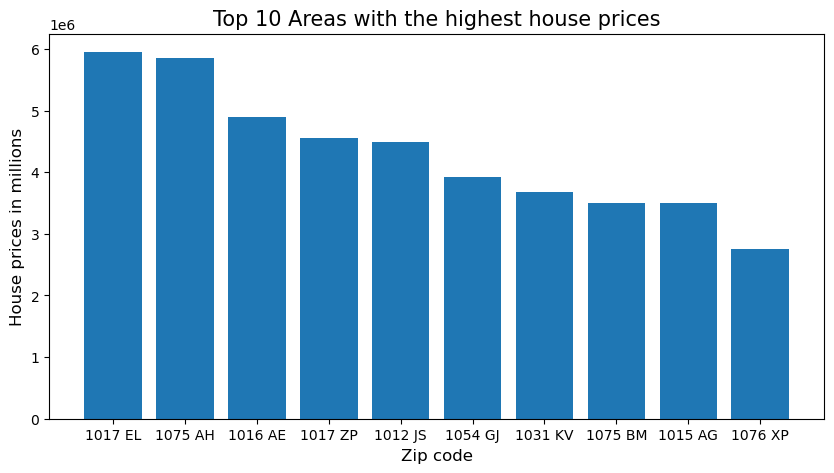

In [ ]:
plt.figure(figsize= (10,5))
plt.bar(zip, Price)
plt.title('Top 10 Areas with the highest house prices',
fontsize=15)
plt.xlabel('Zip code', fontsize = 12)
plt.xticks(fontsize=10)
plt.ylabel('House prices in millions', fontsize=12)
plt.yticks(fontsize=10)
plt.show()

#### 5.3. Create subplots in matplotlib to view multiple perspectives at once:

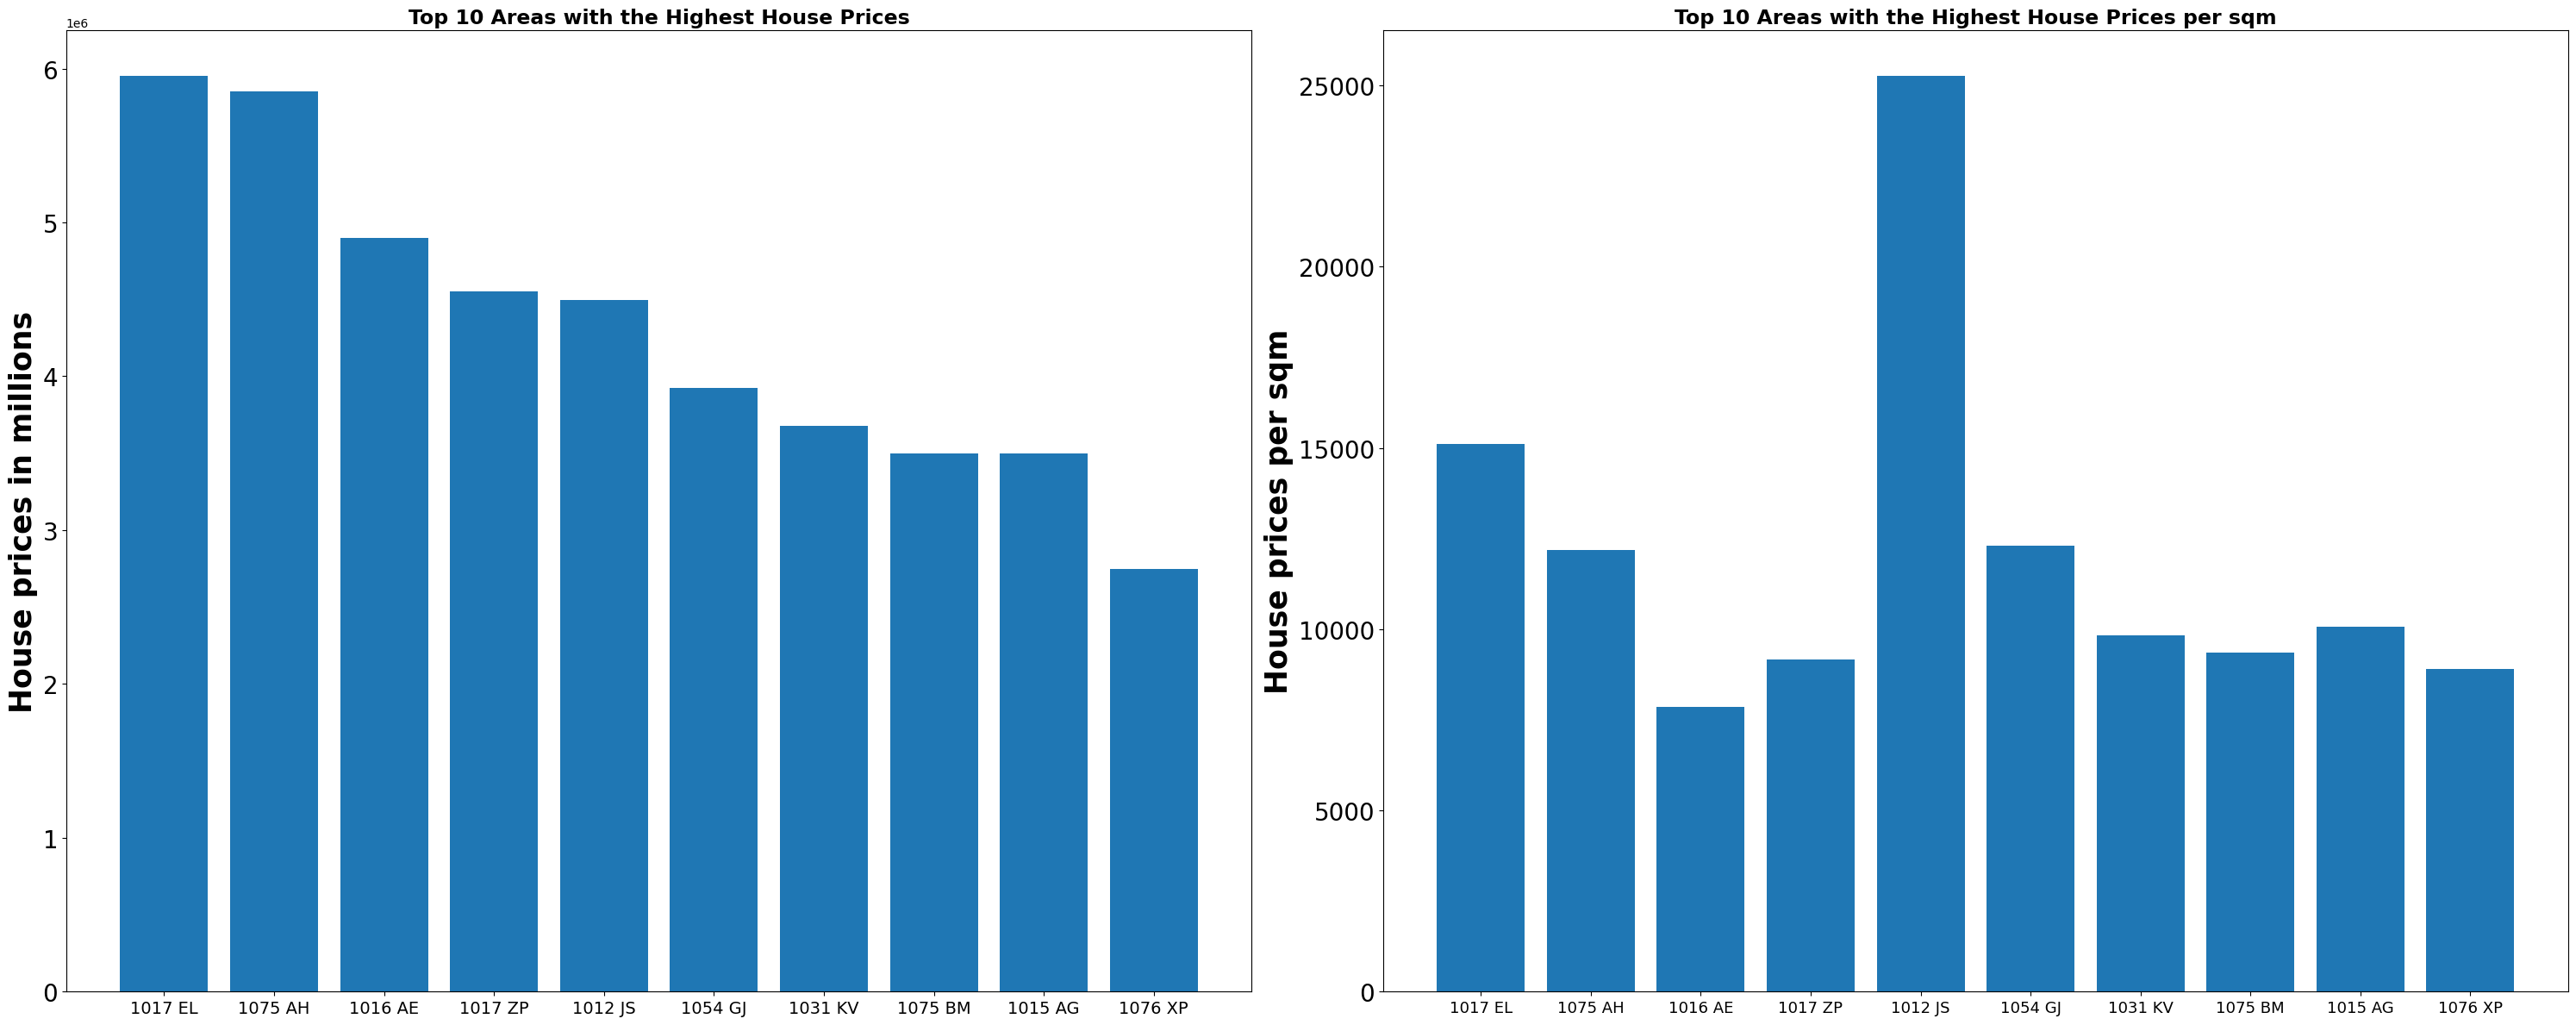

In [ ]:
import matplotlib.pyplot as plt

# Create side-by-side subplots
fig, ax = plt.subplots(1, 2, figsize=(30, 12))

# Data
x = houseprices_data_sorted['Zip'][0:10]
y = houseprices_data_sorted['Price'][0:10]
y1 = houseprices_data_sorted['PriceperSqm'][0:10]

# First plot: House prices
ax[0].bar(x, y)
ax[0].set_title('Top 10 Areas with the Highest House Prices', fontsize=17, fontweight='bold')
ax[0].set_ylabel('House prices in millions', fontsize=25, fontweight='bold')
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=20)

# Second plot: House prices per sqm
ax[1].bar(x, y1)
ax[1].set_title('Top 10 Areas with the Highest House Prices per sqm', fontsize=17, fontweight='bold')
ax[1].set_ylabel('House prices per sqm', fontsize=25, fontweight='bold')
ax[1].tick_params(axis='x', labelsize=13)
ax[1].tick_params(axis='y', labelsize=20)

# Optional: adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


### 6. Visualizing data in Seaborn


#### 6.1. Plot a bar chart in seaborn with basic details:

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/rm/nyzs6ktj6q9b0gzwsk4ntjqw0000gn/T/ipykernel_840/2942765309.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Zip', y='Price', palette='deep')  # Use any palette like 'muted', 'pastel', 'deep', 'Set2'


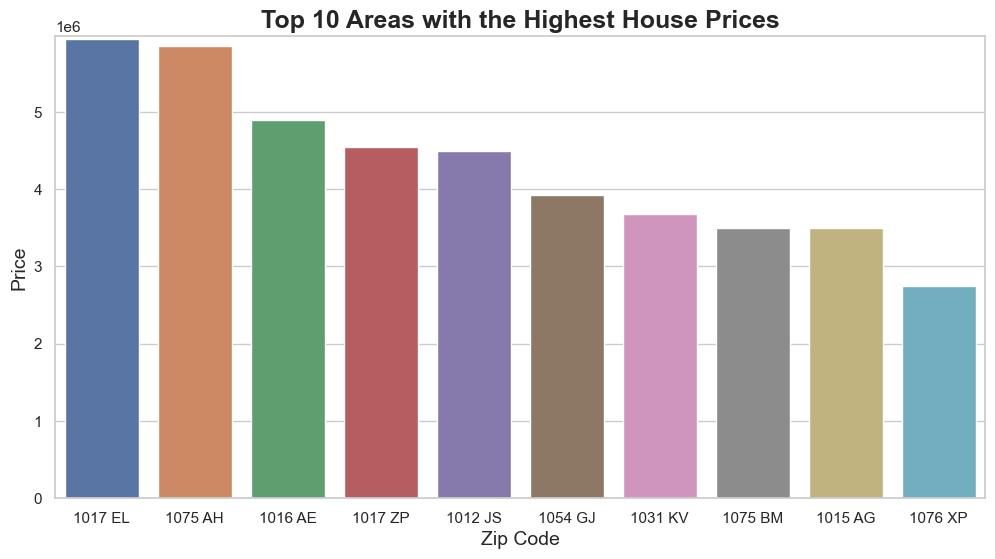

In [182]:
# Apply seaborn style
sns.set(style="whitegrid")  # You can also use sns.set_theme()

# Create the figure
plt.figure(figsize=(12, 6))

# Get top 10 records
data = houseprices_data_sorted[0:10]

# Plot bar chart
sns.barplot(data=data, x='Zip', y='Price', palette='deep')  # Use any palette like 'muted', 'pastel', 'deep', 'Set2'

# Add title and labels
plt.title('Top 10 Areas with the Highest House Prices', fontsize=18, fontweight='bold')
plt.xlabel('Zip Code', fontsize=14)
plt.ylabel('Price', fontsize=14)

#dynamically calculate padding based on your data:
max_price = data['Price'].max()
plt.ylim(0, max_price * 1.005)  # 5% headroom

# Show the plot
plt.show()

#### 6.2. Create subplots in seaborn to view multiple perspectives at once:

/var/folders/rm/nyzs6ktj6q9b0gzwsk4ntjqw0000gn/T/ipykernel_840/2166765738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data= data, x= 'Zip',y = 'Price', ax = ax[0], palette='deep')
/var/folders/rm/nyzs6ktj6q9b0gzwsk4ntjqw0000gn/T/ipykernel_840/2166765738.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data= data, x= 'Zip',y = 'PriceperSqm',


Text(0.5, 1.0, 'Top 10 Areas with the highest price per sqm')

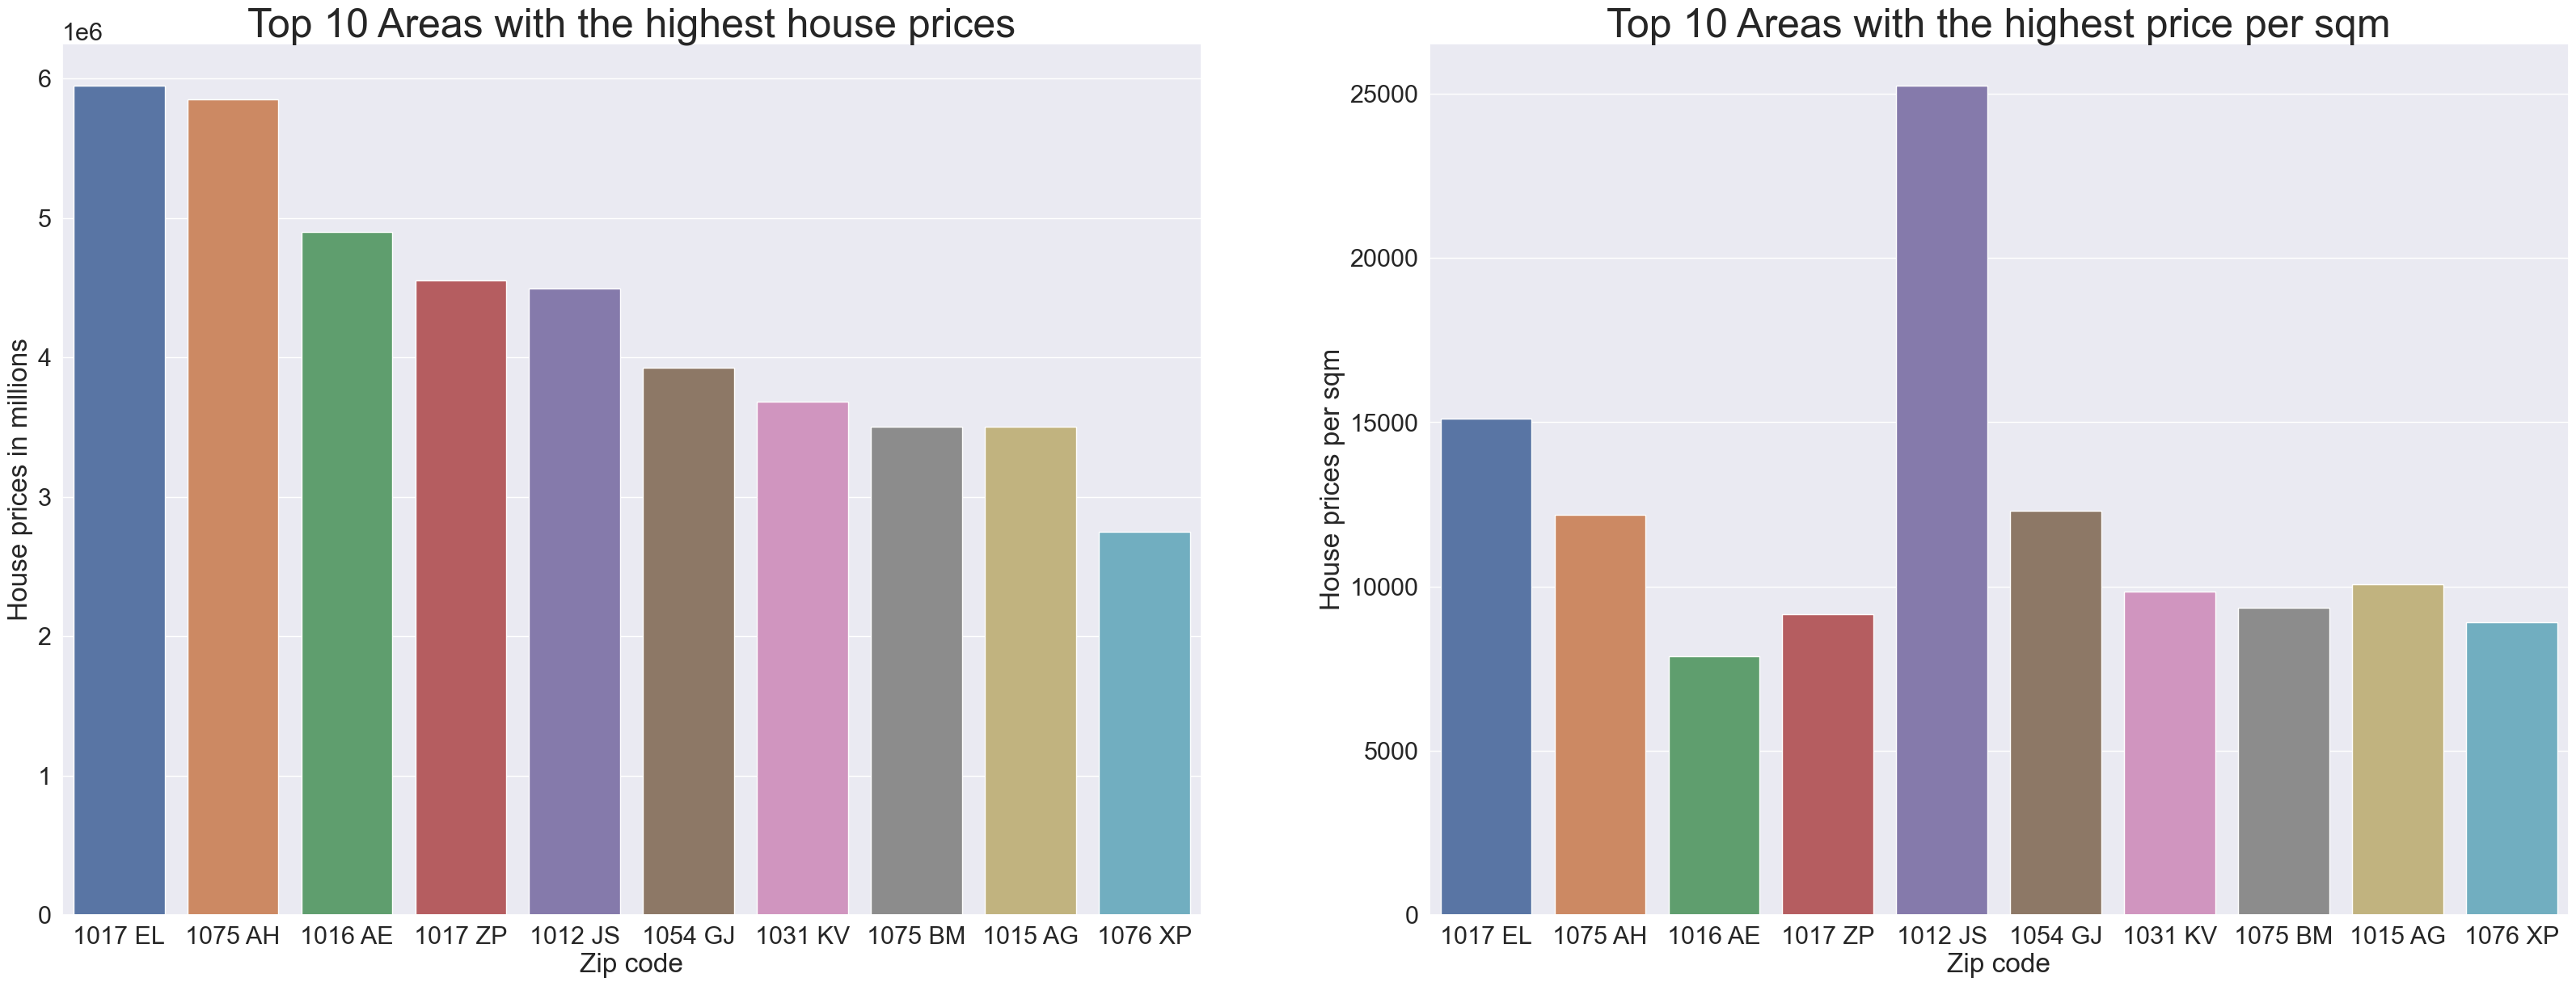

In [187]:
fig, ax = plt.subplots(1, 2,figsize=(40,14))
data = houseprices_data_sorted[0:10]
sns.set(font_scale = 3)
ax1 = sns.barplot(data= data, x= 'Zip',y = 'Price', ax = ax[0], palette='deep')
ax1.set_xlabel('Zip code')
ax1.set_ylabel('House prices in millions')
ax1.set_title('Top 10 Areas with the highest house prices')
ax2 = sns.barplot(data= data, x= 'Zip',y = 'PriceperSqm',
ax=ax[1], palette='deep')
ax2.set_xlabel('Zip code')
ax2.set_ylabel('House prices per sqm')
ax2.set_title('Top 10 Areas with the highest price per sqm')